# Introducción a la API de tf.keras

# Introducción a Keras Sequential

## Autor

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 



## References

1. [Documentación de Keras](https://keras.io/getting-started/sequential-model-guide/)

# Introducción

Keras es una biblioteca de alto nivel que se ubica sobre otros marcos de aprendizaje profundo. Keras es compatible con CPU, GPU y TPU.

Keras no es una librería independiente. Está construida sobre otra biblioteca de aprendizaje profundo o backend basada en tensores. Esto podría ser TensorFlow de Google, Theano de MILA, CNTK de Microsoft o Apache MXNet.

En esta lección usaremos *tf.keras*, como usualmente se denota la implementación de Keras sobre Tensorflow.


<figure>
<center>
<img src="./Imagenes/keras_01.png" width="800" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Biblioteca de alto nivel Keras</p>
</figcaption>
</figure>


Cargamos tensorflow

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Versión de Tensorflow: ", tf.__version__)

from tensorflow.keras import backend as K
print('K.epsilon= ',K.epsilon())

Versión de Tensorflow:  2.1.0
K.epsilon=  1e-07


# Directorios locales

Los siguientes son directorios locales de tarbajo. Modifique aquí, de acuerdo a sus archivos

In [2]:
# imagenes
img_path = './Imagenes/'

# Conjunto de datos MINIST

Usaremos este popular conjunto de datos para ilustar los presentado en la lección. Este conjunto de datos contiene imágenes de dígito escritos a mano. Hay 60.000 imagenes de tamaño $28\times 28$ para entrenamiento y 10.000 del mismo tamaño para test. 

La API de Keras incluye este y muchos otros conjuntpos de datos para ser usados en pruebas y aprendizaje de las personas.

Leemos los datos como sigue

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [6]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

[[2 6 0 0 3]
 [8 5 1 8 0]
 [1 2 7 2 4]
 [6 3 6 9 1]
 [3 0 4 5 0]]


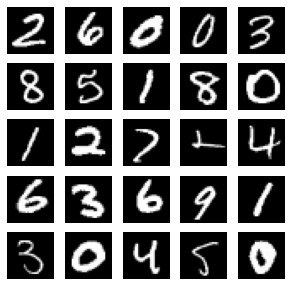

In [7]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    
print(labels.reshape(5,5))

# Especificando la forma de entrada


El modelo necesita saber qué forma de entrada debe esperar. Por esta razón, la primera capa en un modelo secuencial (y solo la primera, porque las siguientes capas pueden hacer inferencia de forma automática) necesita recibir información sobre su forma de entrada. Hay varias formas posibles de hacer esto:

- Pase un argumento *input_shape* a la primera capa. Esta es una tupla de forma (una tupla de enteros o entradas None, donde None indica que puede esperarse un entero positivo). En input_shape, la dimensión del lote no está incluida.
- Algunas capas 2D, como *Dense*, admiten la especificación de su forma de entrada a través del argumento *input_dim*, y algunas capas temporales 3D admiten los argumentos *input_dim* y *input_length*.
- Si alguna vez necesita especificar un tamaño de lote fijo para sus entradas (esto es útil para redes recurrentes con estado), puede pasar un argumento de tamaño de lote a una capa. Si pasa tanto *batch_size = 32* como *input_shape = (6, 8)* a una capa, esperará que cada lote de entradas tenga la forma de lote (32, 6, 8).
Como tal, los siguientes fragmentos son estrictamente equivalentes:

Vamos a rezalizar un modelo de clasificación. Pero antes veámos como transformar los datos para la entrada a la red.

MNIST consiste de 2 tensores 2-dimensionales. Los datos deben ser reformados según vayamos a usar un peeceptron multicapa (MLP), una red convolucionada (CNN) o una red recurrente (RNN).

La gráfica muestra como hacerlo para cada caso.


<figure>
<center>
<img src="./Imagenes/reshape_input.png" width="800" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Transformación de los datos de entrada</p>
</figcaption>
</figure>

# Modelo Perceptron Multicapa

Modelo:

1. densa (256)
2. activación *relu*
3. regularización dropout (0.45)
4. densa(256)
5. activación *relu*
6. regularización dropout (0.45)
4. densa(10)
5. activación *softmax*


El modelo secuencial es una pila lineal de capas.

Puede crear un modelo secuencial pasando una lista de instancias de capa al constructor:

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [9]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [10]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
  
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

In [11]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) 
# -1 permite inferir el tamaño en esa dimnsión
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [12]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

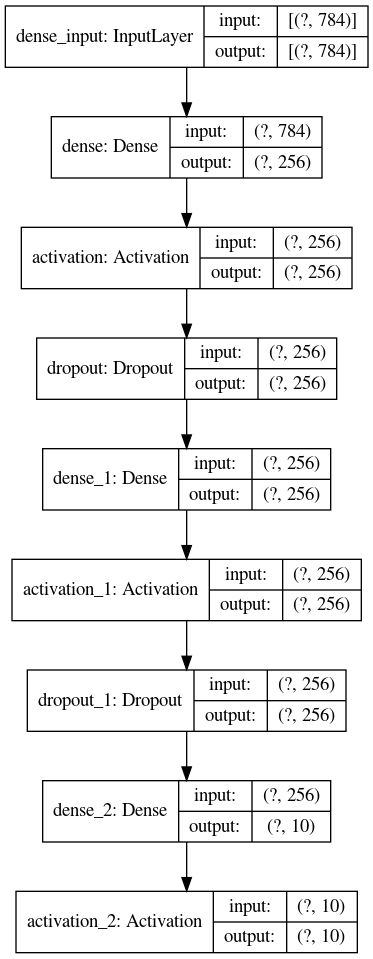

In [13]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file=img_path +'mlp-mnist.png', show_shapes=True)

## Compilación

Antes de entrenar un modelo, debe configurar el proceso de aprendizaje, que se realiza mediante el método de compilación. 

Recibe tres argumentos:

Un optimizador Este podría ser el identificador de cadena de un optimizador existente (como adam, rmsprop o adagrad), o una instancia de la clase *Optimizer*. 

Una *función de pérdida*. Este es el objetivo que el modelo intentará minimizar. Puede ser el identificador de cadena de una función de pérdida existente (como categorical_crossentropy o mse), o puede ser una función objetivo. Ver: pérdidas.
Una lista de métricas. Para cualquier problema de clasificación, querrá establecer esto en métricas = ['precisión']. Una métrica podría ser el identificador de cadena de una métrica existente o una métrica personalizada

In [14]:
# For a multi-class classification problem
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# For a mean squared error regression problem
#model.compile(optimizer='rmsprop',
#              loss='mse')

# For custom metrics
#def mean_pred(y_true, y_pred):
#    return tf.keras.backend.mean(y_pred)

#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics=['accuracy', mean_pred])


## Entrenamiento del modelo

### checkpoints

In [19]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 0.99 accuracy so cancelling training!")
            self.model.stop_training = True

# crea una instancia de clase
accu_callback = myCallback()


In [20]:
# Directory where the checkpoints will be saved
import os 
checkpoint_dir = './training_checkpoints_mnist_mlp'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "mnist_mlp_ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True, 
    monitor='val_accuracy', mode='max',
    save_best_only=True)

In [22]:
epochs = 20
validation_size =0.2

history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_split=validation_size,
                    callbacks=[accu_callback,checkpoint_callback],
                    verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 6s - loss: 0.4649 - accuracy: 0.8572 - val_loss: 0.1594 - val_accuracy: 0.9527
Epoch 2/20
48000/48000 - 4s - loss: 0.2132 - accuracy: 0.9365 - val_loss: 0.1217 - val_accuracy: 0.9638
Epoch 3/20
48000/48000 - 4s - loss: 0.1633 - accuracy: 0.9508 - val_loss: 0.1050 - val_accuracy: 0.9695
Epoch 4/20
48000/48000 - 4s - loss: 0.1360 - accuracy: 0.9590 - val_loss: 0.0953 - val_accuracy: 0.9719
Epoch 5/20
48000/48000 - 4s - loss: 0.1224 - accuracy: 0.9626 - val_loss: 0.0924 - val_accuracy: 0.9734
Epoch 6/20
48000/48000 - 4s - loss: 0.1084 - accuracy: 0.9661 - val_loss: 0.0837 - val_accuracy: 0.9758
Epoch 7/20
48000/48000 - 4s - loss: 0.0992 - accuracy: 0.9691 - val_loss: 0.0894 - val_accuracy: 0.9740
Epoch 8/20
48000/48000 - 4s - loss: 0.0937 - accuracy: 0.9707 - val_loss: 0.0825 - val_accuracy: 0.9761
Epoch 9/20
48000/48000 - 4s - loss: 0.0851 - accuracy: 0.9730 - val_loss: 0.0788 - val_accuracy: 0.9770
Epoch 10/20
48

## Evaluación del modelo

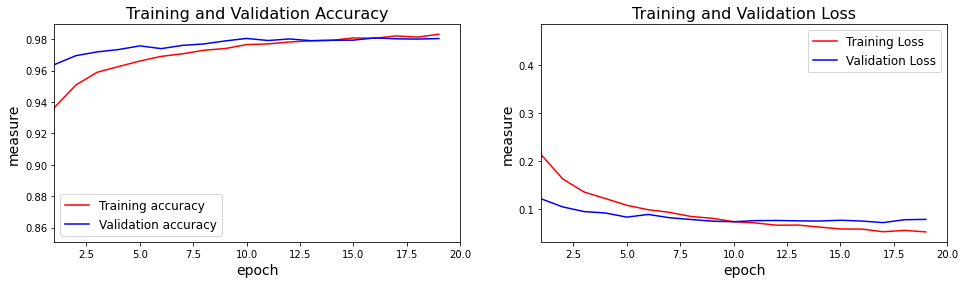

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()

In [25]:
# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (loss))



Test accuracy: 98.2%

Test loss: 0.1%


# Funciones de activación más utilizadas

|nombre| <div style="width:250px">definición matemática</div> |
|---|---|
|relu| $\text{relu}(x)= max(0,x)$|
|softplus|$\text{relu}(x)= \log(1+e^x)$|
|elu|$\text{elu}(x,a)= \begin{cases} x &\text{ si } x\ge 0\\
a(e^x-1) &\text{ en otro caso}\end{cases}$, <br> en donde $a\ge 0$ es un parámetro ajustable|
| selu|  $\text{selu}(x)= k \times \text{elu}(x,a)$ <br> en donde <br>$k= 1.05070098735\ldots$ y <br> $a=1.67326324235\ldots$|
|sigmoide| $\text{sigmoid}(x)= \frac{1}{1+e^{-x}}$|
|tanh|$\text{tanh}(x)= \frac{e^x- e^{-x}}{e^x+e^{-x}}$|

# Regularización

Una red neuronal tiene la tendencia a memorizar sus datos de entrenamiento, especialmente si contiene más capacidad más que lo necesario. En tales casos, la red falla catastróficamente cuando se somete a los datos de prueba. Este es el caso clásico de la red que no se generaliza. Para evitar esta tendencia, el modelo utiliza una capa o función de regularización. Una capa de regularización común es **Dropout**.


La idea del *dropout* es simple. Dada una tasa de dropout (aquí, colocamos dropout = 0,45), la capa dropout retira aleatoriamente esa fracción de unidades en la actuañlización del gradiente Por ejemplo, si la primera capa tiene 256 unidades, después de aplicar dropout = 0.45, solo (1 - 0.45) * 256 unidades = 140 unidades de la capa 1 son actualizadas y solamente esas unidades pasan información a la capa 2.

Hay regularizadores que se pueden usar además de *dropout*, como *l1* o *l2*. En Keras, el sesgo (bias), peso y las salidas de activación se pueden regularizar por capa. 

l1 y l2 favorecen valores de parámetros más pequeños al agregar una función de penalización. Tanto l1 como l2 imponen la penalización usando una fracción de la suma del valor absoluto (l1) o cuadrado (l2) de los parámetros. 

En otras palabras, la función de penalización obliga al optimizador a encontrar valores de parámetros que son pequeños.

Las redes neuronales con valores de parámetros pequeños son más insensibles a la presencia de ruido dentro de los datos de entrada.

# Matemáticas  de la regularización l2

Sipongamos que la función de pérdida sin reularización es dada por $l(\mathbf{w}_1,\mathbf{b}_1, \ldots \mathbf{w}_k,\mathbf{b}_k)$, en donde el subindice hace referencia a cada capa con parábetros entrenables.

Entonces la regularización l2 es introducida capa por capa, de tal forma que la nueva función de pérdida es dada por

$$
lr(\mathbf{w}_1,\mathbf{b}_1, \ldots \mathbf{w}_k,\mathbf{b}_k)= l(\mathbf{w}_1,\mathbf{b}_1, \ldots \mathbf{w}_k,\mathbf{b}_k) + \lambda_1\sum_{w\in \mathcal{W}_1} w^2+ \ldots +  \lambda_k\sum_{w\in \mathcal{W}_k} w^2
$$


Desde el punto de vista estadístico 
la regularización l2 es una forma de introducir  distribuciones a priori para los parámetro. La regulazrización de los terminos bias se hace separado de los pesos, pero en la misma forma.

El siguiente código muestra como introducir regularización l2 en una capa de  entrada.

In [ ]:
# don't run
#from tensorflow.keras.regularizers import l2
#model.add(Dense(hidden_units,
#                kernel_regularizer=l2(0.001),
#                input_dim=input_size))

# Funciones de pérdida

El objetivo del entrenamiento de una red es minimizar una función de pérdida. En el ejemplo de arriba esa función de pérdida es *categorical_crossentropy*. La siguiente tabla muestra la definción de las funciones dd pérdida más comunmente usadas. 

|nombre| <div style="width:350px">definición matemática</div> |
|---|---|
|mean_squared_ error| $\frac{1}{categories}\sum_{i=1}^{categories} (y_i^{label}-y_i^{prediction})^2$|
|mean_absolute_error|$\frac{1}{categories}\sum_{i=1}^{categories} |y_i^{label}-y_i^{prediction}|$|
|categorical_crossentropy|$-\sum_{i=1}^{categories} y_i^{label}\log y_i^{prediction}$|
|binary_crossentropy|$- y_1^{label}\log y_1^{prediction} - (1-y_1^{label})\log(1- y_1^{prediction})$ |

En la tabla: *categories* refiere all número de categorías (10 en el ejemplo de MNIST). En las dos primeras funciones, el promedio es sobre el lote entero de datos. En las dos últimas, la pérdida es por cada dato. Para un lote de datos se promedian las pérdidas.

# Optimización

Con optimización, el objetivo es minimizar la función  de pérdida. 


La idea es que si la pérdida se reduce a un nivel aceptable, el modelo ha aprendido indirectamente la función que asigna entradas a salidas. Las métricas de rendimiento (performance) se utilizan para determinar si un modelo ha aprendido la distribución de datos subyacente. La métrica predeterminada en Keras es **loss**.

En Keras, hay varias opciones para optimizadores. Los optimizadores más utilizados son el *descenso de gradiente estocástico* (SGD), los *momentos adaptativos* (Adam) y la *propagación cuadrática media de raíz* (RMSprop). 

Cada optimizador presenta parámetros ajustables como velocidad de aprendizaje, impulso y decadencia. Adam y RMSprop son variaciones de SGD con tasas de aprendizaje adaptativas.

SGD es considerado el optimizador más fundamental. Es una versión más simple del descenso de gradiente en el cálculo. En el descenso de gradiente (GD), el trazado de la curva de una función cuesta abajo encuentra el valor mínimo, al igual que caminar cuesta abajo en un valle hasta llegar al fondo.

SGD es basada en seleccionar en cada paso una muestra de los datos para actualizar los parámetros en la forma

$$
\mathbf{w} = \mathbf{w}- \lambda \nabla_w g(\mathbf{w}),
$$

en donde

$$
g(\mathbf{w}) = \frac{1}{m} \nabla_{w}\text{loss}(\mathbf{w}).
$$

$m$ es el tamaño del minibatch.

La figura muestra un ejemplo.


<figure>
<center>
<img src="./Imagenes/GD_3D.png" width="800" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Optimizacion: Gradiente descendiente</p>
</figcaption>
</figure>

# Red Convolucional

Modelo:

1. Conv2D(64 filtros)
2. MaxPooling2D(2)
3. Conv2D(64 filtros)
4. MaxPooling2D(2)
5. Conv2D(64 filtros)
6. MaxPooling2D(2)
7. Flatten()
8. Dropout(0.2)
9. Dense(10)
10. Activation('softmax')


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [4]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# imagenes
img_path = './Imagenes/'

In [5]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 576)              

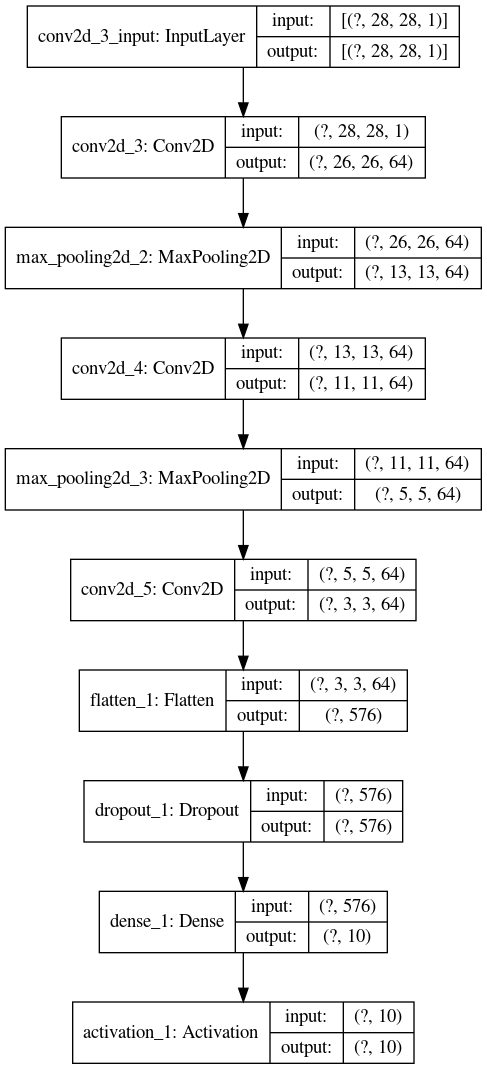

In [9]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file=img_path +'cnn-mnist.png', show_shapes=True)

In [10]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.2544 - accuracy: 0.9211
Epoch 2/10
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.0672 - accuracy: 0.9790
Epoch 3/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.0475 - accuracy: 0.9853
Epoch 4/10
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.0390 - accuracy: 0.9883
Epoch 5/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0319 - accuracy: 0.9899
Epoch 6/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0279 - accuracy: 0.9909
Epoch 7/10
60000/60000 [==============================] - 90s 1ms/sample - loss: 0.0250 - accuracy: 0.9919
Epoch 8/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.0200 - accuracy: 0.9935
Epoch 9/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0185 - accuracy: 0.9939
Epoch 10/10
60

In [12]:
loss, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                   verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (100.0 * loss))


Test accuracy: 99.2%

Test loss: 2.5%


# Modelo recurrente

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [ ]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# imagenes
img_path = './Imagenes/'

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [ ]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file=img_path+'rnn-mnist.png', show_shapes=True)

In [ ]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
loss, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (loss))